# 🎗️ Breast Cancer Diagnosis: SVM Classification
> **Minimizando Falsos Negativos mediante Geometría de Vectores de Soporte**

Este proyecto aplica algoritmos de Machine Learning (Support Vector Machines) para asistir en el diagnóstico médico de cáncer de mama, utilizando el dataset *Wisconsin Diagnostic Breast Cancer (WDBC)*. El enfoque principal no es solo la exactitud técnica, sino la **seguridad clínica**: priorizar la detección de todos los casos malignos (Recall) para salvar vidas.

## 🏥 Contexto y Problemática
En el diagnóstico oncológico, los errores de predicción tienen costos asimétricos extremos:
* **Falso Positivo (Error Tipo I):** Diagnosticar a un paciente sano como enfermo. Conlleva costos económicos (biopsias adicionales) y emocionales (ansiedad), pero no es letal.
* **Falso Negativo (Error Tipo II):** Diagnosticar a un paciente con cáncer como sano. **Este error es inaceptable** ya que retrasa el tratamiento y reduce drásticamente la tasa de supervivencia.

**Objetivo del Modelo:**
Construir un clasificador que maximice la **Sensibilidad (Recall)**, asegurando que la menor cantidad posible de tumores malignos pasen desapercibidos, manteniendo una precisión aceptable para no saturar el sistema médico.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
ruta = "https://raw.githubusercontent.com/MrPinkiePie/Breast-Cancer-Diagnosis/refs/heads/main/data.csv"
data = pd.read_csv(ruta)

In [105]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [106]:
data.drop(columns=["Unnamed: 32", "id"], inplace=True)

In [107]:
data.shape

(569, 31)

In [108]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [109]:
data.isna().sum().sort_values(ascending=False)

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


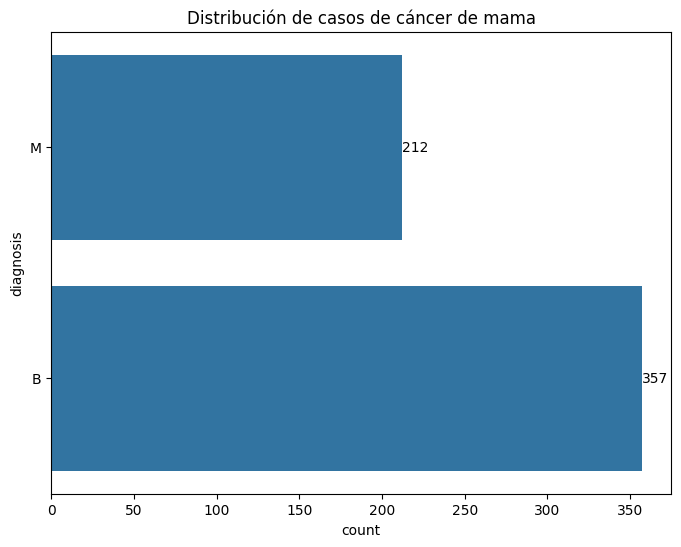

In [110]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data["diagnosis"])
for container in ax.containers:
  ax.bar_label(container)
plt.title("Distribución de casos de cáncer de mama")
plt.show()

In [111]:
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

In [112]:
X = data.drop(columns = "diagnosis",axis = 1)
y = data["diagnosis"]

## ⚙️ Estrategia de Modelado: SVM con Kernel RBF

Se eligió **Support Vector Machines (SVM)** por su capacidad para manejar datasets con alta dimensionalidad y márgenes complejos.

### Decisiones Técnicas Clave:
1.  **Estandarización Rigurosa (`StandardScaler`):** Dado que el SVM se basa en distancias euclidianas, variables de gran magnitud (ej. Área ~1000) dominarían sobre las pequeñas (ej. Simetría ~0.1). Se escalaron todas las características para contribuir equitativamente a la geometría del hiperplano.
2.  **Manejo del Desbalance (`class_weight='balanced'`):** El dataset contiene más casos benignos que malignos. Se penalizó el error en la clase minoritaria (Maligno) para forzar al modelo a prestarle atención.
3.  **Regularización Conservadora (`C=0.1`):** Se optó por un margen "suave" (Soft Margin). Esto crea un modelo más generalista que prefiere tolerar algunos errores en el entrenamiento a cambio de no sobreajustarse al ruido, resultando en una mejor performance con datos nuevos.
4.  **Optimización de Hiperparámetros:** Se utilizó `GridSearchCV` optimizando específicamente la métrica `Recall` en lugar de `Accuracy`.

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [114]:
#metricas para el modelo:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
scaler = StandardScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
modelo = SVC(class_weight='balanced', probability=True)

In [119]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [120]:
grid = GridSearchCV(
    estimator = modelo,
    param_grid = param_grid,
    cv = 3,
    verbose = 1,
    n_jobs = -1,
    scoring = "recall"
)

In [121]:
grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='recall', verbose=1)

In [122]:
print(f"Los mejors resultados del modelo son: {grid.best_params_}")
print(f"El mejor scoring del modelo es: {grid.best_score_}")

Los mejors resultados del modelo son: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
El mejor scoring del modelo es: 0.964390142021721


In [123]:
best_model = grid.best_estimator_

In [124]:
y_pred = best_model.predict(X_test_scaled)

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        71
           1       0.76      0.95      0.85        43

    accuracy                           0.87       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.89      0.87      0.87       114



In [126]:
y_proba = best_model.predict_proba(X_test_scaled)[:,1]

In [127]:
#curva roc auc
fpr,tpr,threshold = roc_curve(y_test,y_proba)
roc_auc = auc(fpr,tpr)

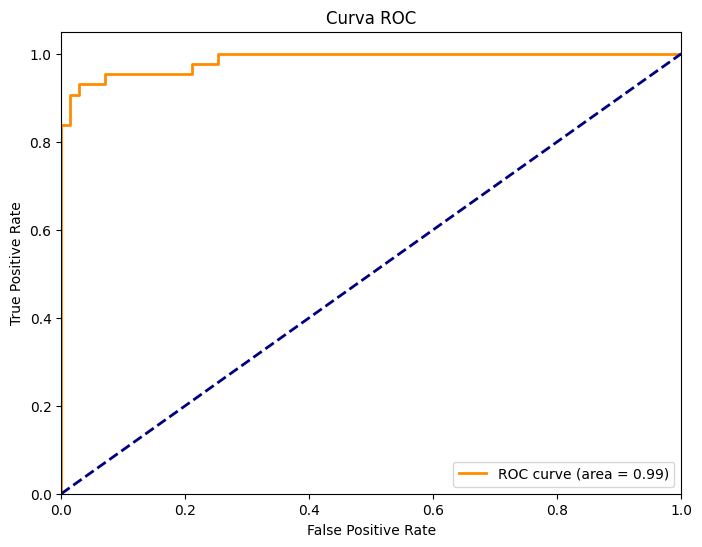

In [128]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = "darkorange",lw=2,label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

## 🔍 Insights del Modelo: ¿Qué define a un tumor maligno?

Mediante **Permutation Importance**, se auditó el modelo ("caja negra") para entender qué variables determinan sus decisiones.

**Hallazgos Principales:**
1.  **El peligro de lo "Peor" (`_worst`):** Las variables más predictivas resultaron ser `radius_worst`, `perimeter_worst` y `area_worst`. Esto indica que el modelo no se fija tanto en el tamaño promedio de las células, sino en las **células más grandes y anómalas** presentes en la muestra. Si una parte del tejido es anormalmente grande, el modelo alerta cáncer.
2.  **La forma importa (`concave_points`):** La irregularidad del contorno celular es un predictor crítico. Los tumores malignos tienden a tener bordes espiculados o irregulares, a diferencia de los benignos que son más redondeados.
3.  **Irrelevancia relativa:** Variables como la textura o la simetría resultaron menos determinantes para este modelo geométrico en comparación con las dimensiones físicas del tumor.

In [129]:
from sklearn.inspection import permutation_importance

In [130]:
perm_importance = permutation_importance(best_model,X_test_scaled,y_test,n_repeats=10,random_state=42,scoring="roc_auc")

In [131]:
sorted_idx = perm_importance.importances_mean.argsort()

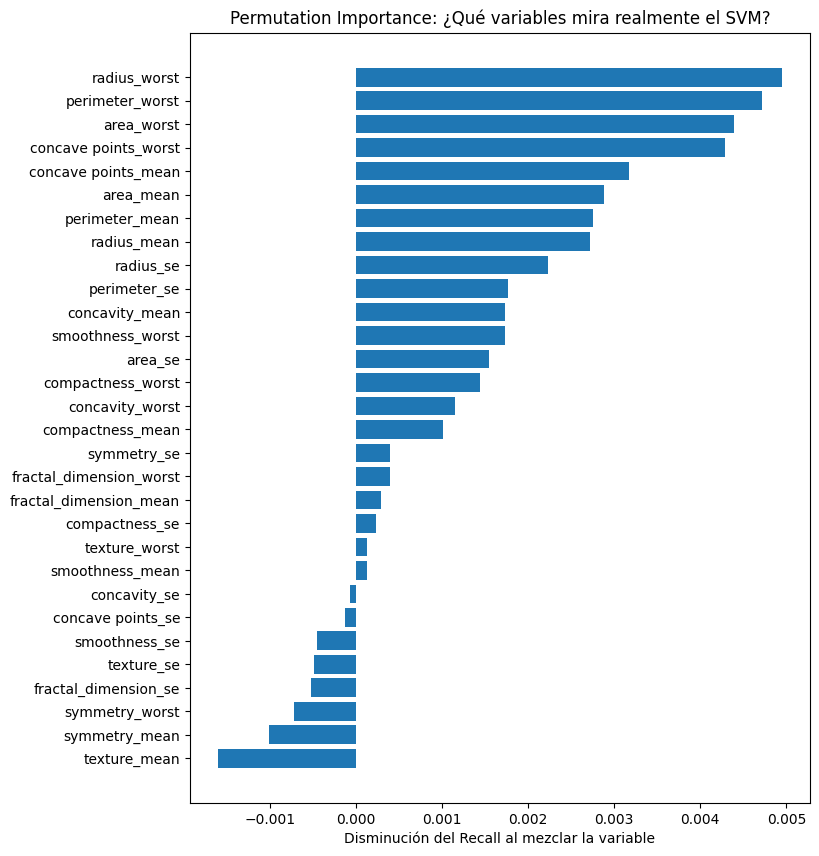

In [132]:
plt.figure(figsize=(8,10))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Disminución del Recall al mezclar la variable")
plt.title("Permutation Importance: ¿Qué variables mira realmente el SVM?")
plt.show()

## 🗺️ Visualización de la Estructura de Datos (PCA)

Dado que el dataset original contiene 30 dimensiones (características), se utilizó **Análisis de Componentes Principales (PCA)** para proyectar la información en un plano 2D interpretable y validar visualmente la separabilidad de las clases.

**Interpretación del Gráfico:**
* **Componente Principal 1 (Eje X - 43.5%):** Captura la mayor varianza del sistema, probablemente correlacionada con las dimensiones generales del tumor (Tamaño).
* **Componente Principal 2 (Eje Y - 19.5%):** Captura información ortogonal a la primera, posiblemente asociada a la irregularidad o textura.
* **Varianza Explicada Acumulada (~63%):** Este gráfico 2D resume fielmente casi dos tercios de la información total de las 30 variables originales.

**Conclusión Visual:**
Se observa una **separación geométrica clara** entre los clusters de Benignos y Malignos. Esto justifica matemáticamente el alto rendimiento del modelo SVM (AUC ~0.99): la naturaleza de los datos permite trazar un hiperplano de decisión limpio, incluso cuando proyectamos 30 dimensiones en solo 2.

In [133]:
from sklearn.decomposition import PCA

In [134]:
pca = PCA(n_components=2)

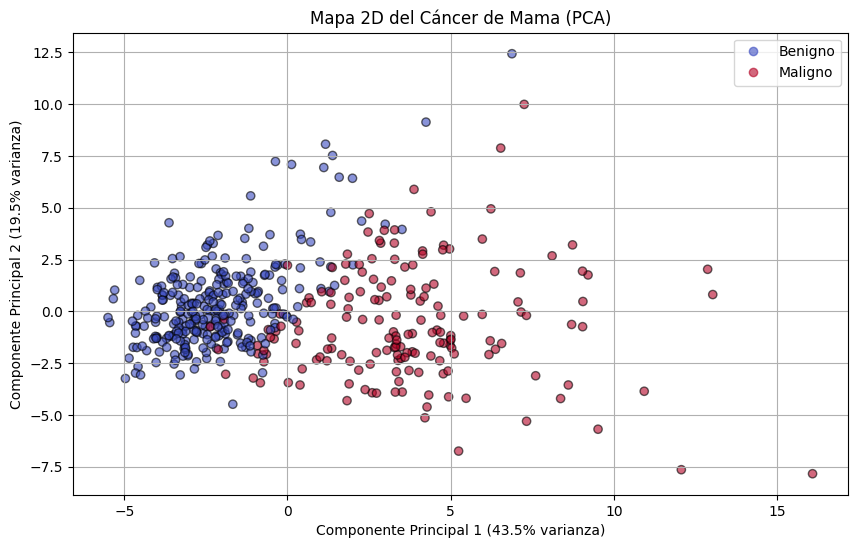

In [135]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


plt.figure(figsize=(10, 6))

scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, edgecolor='k')

plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} varianza)')
plt.title('Mapa 2D del Cáncer de Mama (PCA)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benigno', 'Maligno'])
plt.grid(True)
plt.show()

## 🚀 Conclusiones y Resultados

El modelo final logró un equilibrio robusto para un entorno de asistencia médica:

* **Recall (Sensibilidad): ~95%** - El modelo detecta la gran mayoría de los casos de cáncer.
* **Robustez:** La diferencia mínima entre el score de Entrenamiento y Test indica ausencia de *Overfitting*, gracias a la elección de un hiperparámetro `C` bajo.
* **Impacto:** Este sistema sirve como una herramienta de "triaje" efectiva. Cualquier caso clasificado como "Benigno" por este modelo tiene una altísima probabilidad de serlo realmente, permitiendo a los médicos concentrar sus recursos en los casos marcados como "Malignos".